In [ ]:
### Till now-->> 2 hours 02 mins (10 lectures)

In [ ]:
### Plan-->> 2:20:00-2:30:00 mins (ie approx 14 lectures of 10 mins each)

### What we often do in this use-case
    High level over-view..
    
    a)We will try to solve same problem statements from various perspective(from beginners(frshers) point of view 
    & ofcourse from experienced folks) which will help u to gain coding skills & helps u in building logics.. & this 
    will cover lots of students & working professional from wide spectrum..
    
    Again if u r fresher  , kindly focus more on freshers approach  , ofcourse u can continue with optimal code
    (experienced folks) , as writing  optimal code will definitely help u in long run..
    
   
    b)We will solve most of those challenges that we often face in real world..
    
    c)we will focus primarily on each & every part of data science life-cycle..
    
    
    a)Data collection
    b)Perform Data Cleaning 
    c)perform featurization or feature engineering
    d)Data visuaslisation(EDA)
    e)Feature encoding
    f)checking outliers & impute it..
    g)Feature selection or feature importance
    h)build machine leaning model & dump it..
    i)hypertune ml model..along with cross validation
    j)Interpretation of ml model using Explainable AI like shap , lime
    j)how to build pipeline(basic pipeline) & advacnced pipeline
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

### __version__ are called magic method in python..

'1.2.4'

#### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well


In [26]:
### This is a question that usually appears in interviews that how to read files without using pandas..

In [3]:
train_data=pd.read_excel(r'E:\End-2-end Projects\Flight_Price/Data_Train.xlsx')

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
### why there is a need to append 'r' (raw_string?

In [ ]:
'''
What is a raw string??

'''

In [23]:
s='Hello\tPython'
print(s)

### Now, here s is a normal string literal, 
## the sequences “\t” will be treated as escape characters.

Hello	Python


In [7]:
s = "Hello\xPython"
print(s)


##  "SyntaxError: (unicode error) 'unicodeescape' codec ca
n't decode 
## bytes in position 5-6: truncated \xXX escape"
## as there is no such definition for sequence '\x' ,hence u are getting unicode error , 
## it means it cant be decoded using the standard unicode encoding !

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 5-6: truncated \xXX escape (<ipython-input-7-511f54e16828>, line 1)

In [ ]:
'''
This means that we cannot put it into a normal string literal. What can we do now?

This is where raw string come handy.
## so just to convert normal string into raw string  , u can think of appending "r" or "R"!

'''

In [11]:
s = r"Hello\xPython"
print(s)


Hello\xPython


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

## train_data.isnull().sum(axis=0)
## by-default axis is 0 , ie it computes total missing values column-wise !

## train_data.isnull().sum(axis=1) -->> if axis=1 , 
## ie it computes total missing values row-wise !

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [32]:
### getting percentage of the missing values in all feature
## train_data.isnull().sum()/len(train_data)*100

## train_data.isnull().mean()*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [8]:
### getting all the rows where we have missing value
train_data[train_data['Total_Stops'].isnull()] 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### as we have 1 missing value , I can directly drop these

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [11]:
data=train_data.copy()

## lecture 2: Pre-process & Perform Featurization of "Date_of_Journey"
    ie pre-process it & extract day,month,year from this year

In [ ]:
data.dtypes

#### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp 
     so as to use this column properly for prediction,bcz our 
     model will not be able to understand Theses string values,
     it just understand Time-stamp For this we require pandas 
     to_datetime to convert object data type to datetime dtype.


    

In [ ]:
'''
In date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,
## ns is basicaly nano second..

Both are similar , it entirely how your numpy was compiled..

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')
## True

'''

In [12]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [16]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [18]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [ ]:
### it means our data belongs to 2019 year only, 
## hence extracting year feature & consider this as a input to my 
##  machine learning model makes no sense !

### but if we have more than 1 year  , then of-course it makes sense !

### we have all the data of 2019 year thats why it makes no sense to 
## consider this feature as a input to my machine learning model,
### but ya , if we have more than 1 year , ofcourse it makes sense

In [19]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !

In [ ]:
## 1..baby approach  ( directly using date-time module)
## 2..just define own custom functions..
## 3..using map  ( ie define function apply function on top of data)
#   ie , map(func ,seq)


## 4..using lambda            (Assignment questions)


## 5.. using splitting of date , 
# if your Date_of_Journey feature is not a date-time or if it belongs to string nature..u can think of using your split function
# but again thats not a handy way , bcz if we u have different formats of date , it will not be handy...

In [65]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
### udemy code :

#### 1..baby approach 

In [20]:
data['Journey_day']=data['Date_of_Journey'].dt.day

In [21]:
data['Journey_month']=data['Date_of_Journey'].dt.month

In [22]:
data['Journey_year']=data['Date_of_Journey'].dt.year

In [24]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-02-06 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-06 05:50:00,2022-02-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


#### 2..just define own custom functions..

#### in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
    datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
    Both are similar , it entirely how your numpy was compiled..

In [72]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [ ]:
### ie I will pass any feature to this below function , it will return day , month , year from this..

In [50]:
'''
def fetch_dt_att(dataframe,feature):
    try:
        if dataframe[feature].dtype=='<M8[ns]' or 'datetime64[ns]' :
            return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])
    except:
        ## to_datetime will parse the dates, which are currently coded as strings, into datetime format
        dataframe[feature]=pd.to_datetime(dataframe[feature])
        return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])
'''

In [55]:
## df[['Journey_day','Journey_month','Journey_year']]=fetch_dt_att(data,'Date_of_Journey')

In [66]:
## data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### 3..Using map

In [85]:
def fetch_dt_att2(x):
    return ([x.day,x.month,x.year])


In [41]:
### before applying above function , make sure it must be of date-time nature..
data['Date_of_Journey'].dtype

dtype('<M8[ns]')

In [87]:
## data[['Journey_day','Journey_month','Journey_year']]=pd.DataFrame(map(fetch_dt_att2,data['Date_of_Journey'])).rename(columns={0:'day',1:'month',2:'year'})

In [88]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24.0,3.0,2019.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5.0,1.0,2019.0


#### 4..using lambda

In [ ]:
'''
data['Date_of_Journey'].apply(lambda x:x.year)
data['Date_of_Journey'].apply(lambda x:x.month)
data['Date_of_Journey'].apply(lambda x:x.day)

'''

#### 5.. using splitting of date

In [ ]:
## if your Date_of_Journey feature is not a date-time or if it belongs to string nature..u can think of using your split function
# but again thats not a handy way , bcz if we u have different formats of date ,ie DD/MM/YY , MM/DD/YY  , MM-DD-YYYY etc.. 
# it will not be handy...

'''

### https://www.kaggle.com/tanvikurade/flight-ticket-prediction-eda-model

data['Journey_day']=data['Date_of_Journey'].str.split('/').str[0]
### data['Journey_day']=data['Date_of_Journey'].apply(lambda x:x.split('/')[0])

data['Journey_month']=data['Date_of_Journey'].str.split('/').str[1]
### data['Journey_month']=data['Date_of_Journey'].apply(lambda x:x.split('/')[1])

data['Journey_year']=data['Date_of_Journey'].str.split('/').str[2]
### data['Journey_year']=data['Date_of_Journey'].apply(lambda x:x.split('/')[2])

'''

### but if my Date_of_Journey has multiple formats of date ie DD/MM/YY , MM/DD/YY  , MM-DD-YYYY etc.. 
### then above approach will not be handy

In [25]:
## Since we have extracted date ,month & year from Date_of_Journey ,
## Now we can drop as it is of no use.
data.drop('Date_of_Journey', axis=1, inplace=True)

In [26]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-02-06 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-06 05:50:00,2022-02-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [98]:
### we have all the data of 2019 year thats why it makes no sense 
## to consider this feature as a input to my machine learning model,
### but ya , if we have more than 1 year , ofcourse it makes sense

data['Journey_year'].unique()

array([2019], dtype=int64)

# Lecture 3.. Lets try to clean Dep_Time & Arrival_Time & featurize it..
     "2022-02-05 22:20:00"  ->> extracting year,month,day makes no sense 
      bcz we have extracted already these features from  "Date-Of-Journey"
     
    Hence lets extract arrival_time_hours & arrival_time_mins from this 
    
    bcz our ml_model is not able to understand that arrival time is 22;20 as its a string data
    so we will say to our model hey this is arrival hour  ,this is arrival minute 
    bcz ml_model is only about mathematics & mathematics works only with numbers

#### we will clean & featurize it 
    a) considering beginners(freshers) students point of view 
       (using data-time module)
    b) of-course for experienced folks, we will try to write 
        optimized code( using lambda ,  map ,own logic)


#### a) considering beginners(freshers) students point of view

In [44]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-02-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-05 05:50:00,2022-02-05 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [53]:
### imagine we have arival time as ' 22:20 07 March' ,thats why very first we have to remove xtra spaces..

train_data['Arrival_Time'][0].strip().split(' ')[0]

'01:10'

In [100]:

### access hour 
train_data['Arrival_Time'][0].strip().split(' ')[0].split(':')[0]

'01'

In [293]:
#### now lets convert this hour into integer format

In [101]:
int(train_data['Arrival_Time'][0].strip().split(' ')[0].split(':')[0])

1

In [295]:
hours=[]
for i in train_data['Arrival_Time'].index:
    hours.append(int(train_data['Arrival_Time'][i].strip().split(' ')[0].split(':')[0]))

In [296]:
## train_data['Arrival_Time_hours']=hours

In [297]:
## train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,13


#### b)lets write optimal code..
    1..using lambda
    2..using map

In [59]:
data['Dep_Time'][0]

Timestamp('2022-02-05 22:20:00')

In [60]:
str(data['Dep_Time'][0])

'2022-02-05 22:20:00'

In [58]:
## data['Dep_Time'].apply(lambda x:str(x).strip().split(' ')[1].split(':')[0]) ## hour

## data['Dep_Time'].apply(lambda x:str(x).strip().split(' ')[1].split(':')[1]) ## minute

0        22
1        05
2        09
3        18
4        16
         ..
10678    19
10679    20
10680    08
10681    11
10682    10
Name: Dep_Time, Length: 10682, dtype: object

In [74]:
### as'Dep_Time' of train_data belongs to string nature , hence we can call directly strip() & split() directly on 'Dep_Time'
## train_data['Dep_Time'].dtype

dtype('O')

In [70]:
## train_data['Dep_Time'].apply(lambda x:int(x.strip().split(' ')[0].split(':')[0])) ## hour

## train_data['Dep_Time'].str.strip().apply(lambda x:x.split(' ')[0].split(':')[0])

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_Time, Length: 10682, dtype: int64

In [299]:
#### lets create a function to extract hour , minute from feature & later-on we can delete than feature as it is of no use

In [300]:
'''
def extract_hour_min(df,col):
    df[col+"_hours"]=train_data[col].apply(lambda x:int(x.strip().split(' ')[0].split(':')[0]))
    df[col+"_minutes"]=train_data[col].apply(lambda x:int(x.strip().split(' ')[0].split(':')[1]))
    df.drop(col,axis=1,inplace=True)
    return df.head(2)
'''

In [301]:
extract_hour_min(train_data,'Arrival_Time')

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hours,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,5,1,2019,13,15


In [302]:
# Departure time is when a plane leaves the gate. 

# extract_hour_min(train_data,'Dep_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50


#### Code for Udemy :

In [27]:

def extract_hour_min(df,col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)
    

In [28]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

extract_hour_min(data,'Dep_Time')


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [29]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [ ]:
### lets clean & Featurize 'Arrival_Time' !

In [30]:
extract_hour_min(data,'Arrival_Time')


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


# Lecture 4:

### lets analyse when will most of the flights will take-off

In [31]:
#### Converting the flight Dep_Time into proper time i.e.
## mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'



<AxesSubplot:>

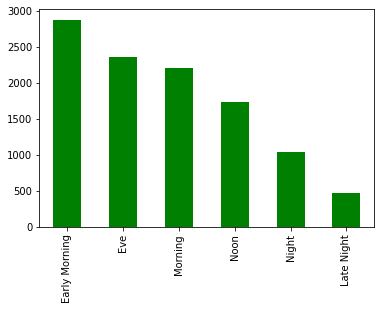

In [32]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar',color='g')

In [ ]:
#### how to make above graph interactive , 
## lets use Cufflinks & plotly to make it interactive !

In [38]:

## how to use Plotly interactive plots directly with Pandas dataframes, 
## First u need below set-up !

# plotly packages
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, /
                    init_notebook_mode, plot, iplot

cf.go_offline()


## plot is a command of Matplotlib which is more old-school.
## & It creates static charts

## iplot is an interactive plot. Plotly takes Python code and 
## makes beautiful looking JavaScript plots.



## what about temp.iplot()?
## I think it uses the Cufflinks wrapper over plotly that runs 
## Matplotlib under the hood.

## It seems to be the easiest way for me to get interactive plots with 
## simple 1 line code,Although it needs some libraries to setup


In [ ]:
### data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [ ]:
### imagine there is no such value_counts() ,then how to code it up ?

In [91]:
data['Dep_Time_hour'].apply(flight_dep_time).reset_index().groupby(['Dep_Time_hour']).size()
## data['Dep_Time_hour'].apply(flight_dep_time).reset_index().groupby(['Dep_Time_hour'])['Dep_Time_hour'].count()

Dep_Time_hour
Early Morning    2880
Eve              2357
Late Night        465
Morning          2209
Night            1040
Noon             1731
dtype: int64

<AxesSubplot:xlabel='Dep_Time_hour'>

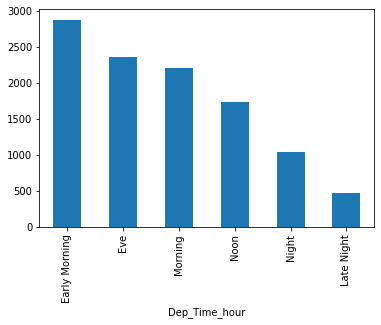

In [94]:
data['Dep_Time_hour'].apply(flight_dep_time).reset_index().groupby(['Dep_Time_hour']).size().sort_values(ascending=False).plot(kind='bar')

# Lecture 5: Pre-process Duration Feature & 
# extract meaningful features  , ie duration_hour & duration_mins..

### Lets Apply pre-processing on duration column,
    -->> Once we pre-processed our Duration feature , lets featurize 
        this feature & extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it 
         contains string values , thats why we have to tell our
        Ml Model that this is hour & this is minute..

#### lets try to clean duration column 
    a)using line by line code (for freshers & non-IT guyss)
    b)using optimal code (for experienced folks) let say , 
      function or lambda 

In [102]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


In [308]:
'2h 50m'.split(' ')

['2h', '50m']

In [309]:
len('2h 50m'.split(' '))

2

In [310]:
'''
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].strip().split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
            ## duration[i]=duration[i] + ' ' + '0m'
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
            ## duration[i]='0h' + ' ' + duration[i]
'''

In [311]:
## data['Duration']=duration

#### udemy code :

In [37]:

def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

data['Duration']=data['Duration'].apply(preprocess_duration)


In [313]:
#### optimal code to clean duration feature

In [314]:
### lambda syntax for nested-if-else 
### lambda <args> : <return Value> if <condition > else ( <return value > if <condition> else <return value>)


## data['Duration'].apply(lambda x:x if len(x.strip().split(' '))==2 else(x+' 0m' if 'h' in duration[i] else '0h ' + x))

### data['Duration'].apply(lambda x:'0h '+x if 'h' not in x else(x+' 0m' if 'm' not in x else x))

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [103]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


#### Now after pre-processing duration feature , my ml_model is not able to understand
     duration bcz it is string data so any how
#### we have to convert it into numerical(integer of float) values


#### now there are 2  ways to do this..
    a)extract duration_hour & duration_mins from duration feature..
    
    b)convert duration feature into minutes or seconds
      Note-- but it is good to convert it into minutes , then there is a less prob. 
             that we may face cond. of outlier  But if we convert it into seconds , 
             then we might have huge diff. in values , then we have to use
             feature scaling techniques to order to get rid of above issue..

#### udemy code :

In [42]:

data['Duration_hours']=data['Duration'].apply(lambda x:\
                                              int(x.split(' ')[0][0:-1]))

data['Duration_mins']=data['Duration'].apply(lambda x:\
                                             int(x.split(' ')[1][0:-1]))

In [43]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


In [ ]:
'''

train_data['Duration'].apply(lambda x:(int(x.split(' ')[0][0:-1]),int(x.split(' ')[1][0:-1])))
np.array(train_data['Duration'].apply(lambda x:(int(x.split(' ')[0][0:-1]),int(x.split(' ')[1][0:-1]))))

### now we have to unzip it..
data['Duration_hours'],data['Duration_mins']=zip(*np.array(train_data['Duration'].apply(lambda x:(int(x.split(' ')[0][0:-1]),int(x.split(' ')[1][0:-1])))))

'''

# 6..Lets Analyse whether Duration impacts on Price or not ?

In [ ]:
###  convert duration feature into minutes or seconds

In [129]:
eval('2*25+1')

51

In [44]:
###eval is a in-built function of python which evaluates the “String” 
## like a python expression and returns the result as an integer.

data['Duration_total_mins']=data['Duration'].str.replace('h','*60').\
               str.replace(' ','+').str.replace('m','*1').apply(eval)

## data['Duration_total_sec']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)*3600

In [45]:
data.drop('Duration',axis=1,inplace=True)

In [ ]:
### Duration_total_mins vs Price

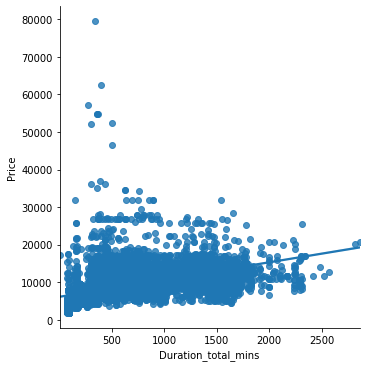

In [46]:
#### It Plot data and regression model fits across a FacetGrid. 
## ( combination of 'regplot` and :class:`FacetGrid)

#### its a extended form of scatter plot..

sns.lmplot(x='Duration_total_mins',y='Price',data=data)


### pretty clear that As the duration of minutes increases Flight price also increases.

In [ ]:
### lets understand whether total stops affect price or not !

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

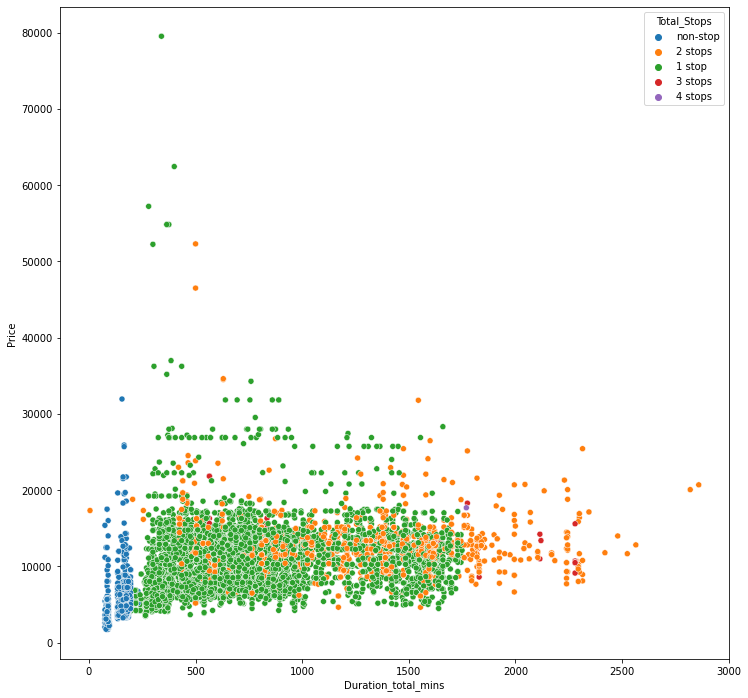

In [50]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Duration_total_mins',y='Price',hue='Total_Stops',data=data)

In [ ]:
'''
Non stops flights take less duration while their fare is also low, 
## then as the stop increases, duration also increases and price also 
## increases(in most of the cases)

'''

In [ ]:
#### Simlarly ,, duration_total_mins ,Price & Airline..

## which city has maximum final destination of flights ?

<AxesSubplot:xlabel='Destination', ylabel='count'>

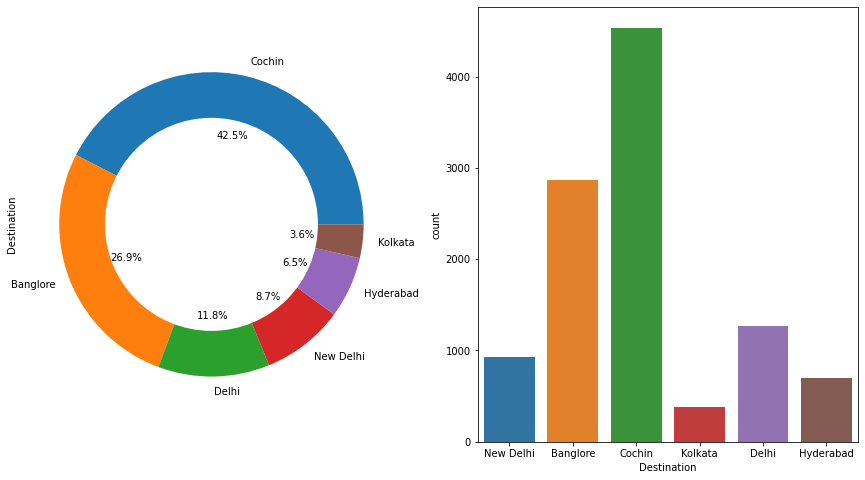

In [51]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
### use '%1.1f%%' to represent values in %..
data['Destination'].value_counts().plot.pie(autopct='%1.1f%%')

### lets make a donut chart to make it more cool ,
### plt.Circle((circles centre , radius ,facecolor='white')
centre=plt.Circle((0,0),0.7,fc='white')

### now we have to map this circle on top of my pie chart
### so very first access our figure , to access figure we have to 
## use plt.gcf()

fig=plt.gcf()

### to add this circle on top of my pie , very first we have to 
## get our current axes ,so to get axis , I will say as plt.gca()
### now we have to call fig.gca().add_artist(centre) to add my circle 
## on top of my pie chart..

fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Destination',data=data)


In [ ]:
'''
Final destination of majority of flights is Cochin. 
There are two values for Delhi destination which needs to be corrected,

'''

# Lecture 7:

# Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights
    on which route Jet Airways is extremely used???

In [53]:

'''
jt=data[data['Airline']=='Jet Airways']
jt['Route'].value_counts()

'''

data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)
### data[data['Airline']=='Jet Airways'].groupby('Route').count()['Airline']



Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Airline vs Price Analysis
    ie finding price distribution & 5-point summary of each Airline..
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

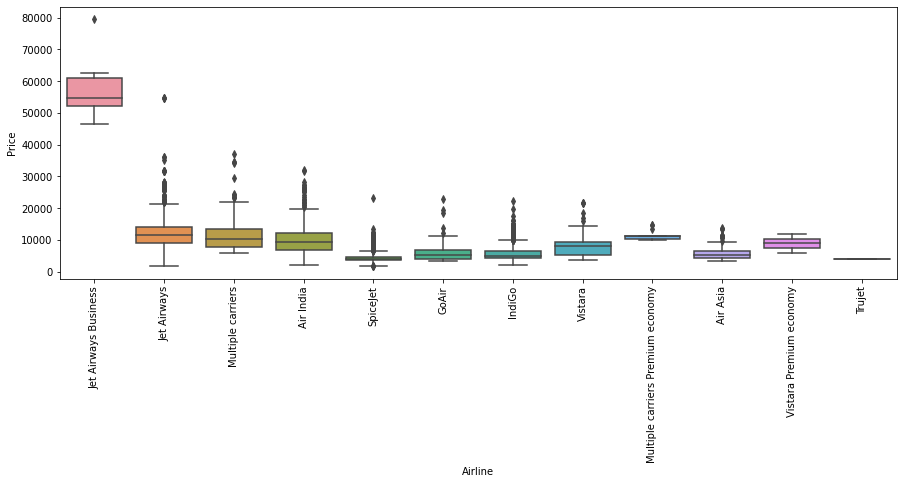

In [56]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')

In [ ]:
### when we need boxplot + distribution both , its good to consider violinplot..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

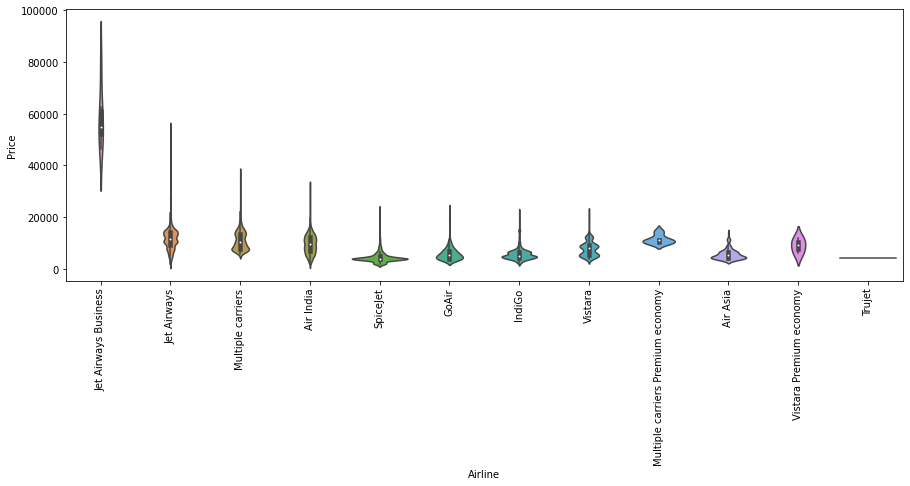

In [57]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')

In [ ]:
### similarly , Total_Stops vs Price Analysis
### similarly , Source vs Price

### simialrly , destination vs price as well..
### airline & duration_mins as well...
### source & duration_mins as well...
### destination & duration_mins as well...
### total_stops & duration_mins as well...

#### Perform Total_Stops vs Price Analysis
    Does Total_stops of any Airline affect Price of Tickets ?

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

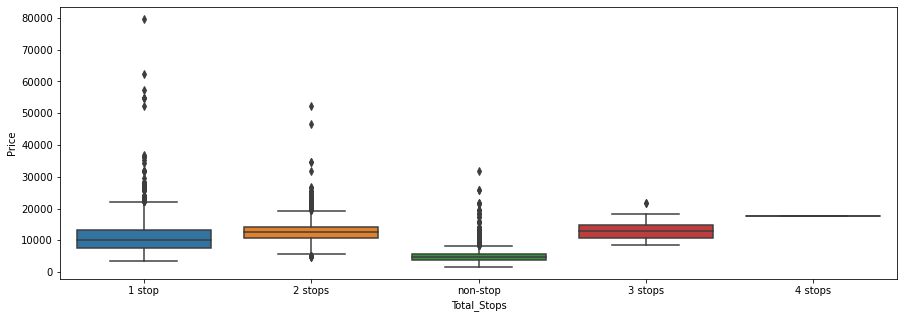

In [252]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

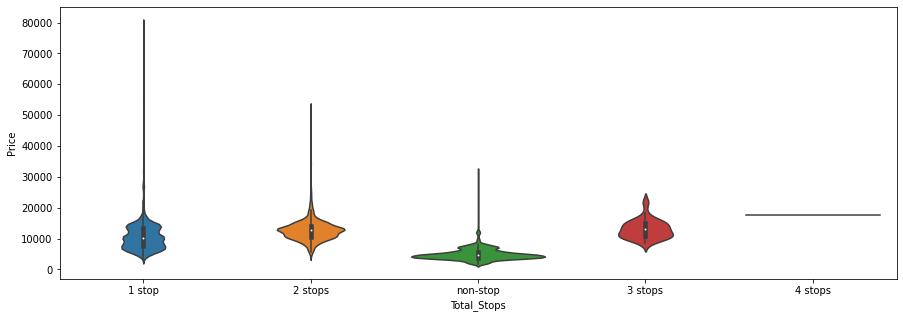

In [128]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

### Source vs Price

<Figure size 1080x360 with 0 Axes>

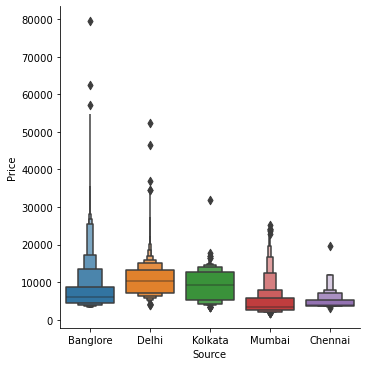

In [253]:
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen')

## kind='boxen' ie boxplot

In [254]:
### simialrly destination vs price as well..
### airline & duration_mins as well...
### source & duration_mins as well...
### destination & duration_mins as well...
### total_stops & duration_mins as well...

# Lecture 8: one-hot !

In [59]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


#### Understanding Additional_Info feature

In [60]:
np.round(data['Additional_Info'].value_counts()/len(train_data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
2 Long layover                   0.01
Red-eye flight                   0.01
1 Short layover                  0.01
Name: Additional_Info, dtype: float64

In [61]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
## lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

data.drop(columns=['Route','Additional_Info','Duration_total_mins','Journey_year'],axis=1,inplace=True)

In [66]:
data.dtypes

Airline                object
Source                 object
Destination            object
Total_Stops            object
Price                   int64
Journey_day             int64
Journey_month           int64
Journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
Duration_total_mins     int64
dtype: object

### find categorical data & numerical data !
    Separating Categorical Data
    a)using in-built functions
        using select_dtypes in-built function of pandas
        using _get_numeric_data() to get numeric columns and then find out categorical columns
        using isin


    b)using own code
        using list comprehension
        using list 
        using dictionary
        using filter & enumeration..  
        By filtering-out elements from list

In [67]:
### cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col=[col for col in data.columns if data[col].dtype=='object']
cat_col

['Airline', 'Source', 'Destination', 'Total_Stops']

In [69]:
num_col=[col for col in data.columns if data[col].dtype!='object']
print(num_col)

['Price', 'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_mins', 'Duration_total_mins']


### Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case
    
    But in real-world , it is not necessary that u have to always One-hot or label , hence we will discuss more interesting approaches to do this !

#### since airline , source , Destination is a nominal feature , so we can think onehot encoder on top of this..
    But there are some drawbacks of One-hot !

#### There are multiple ways to perform onehot encoding ,
    a)Using pandas (pd.get_dummies)

    b)using sklearn (OneHotEncoder) that is available in sub-module of pre-processing
      from sklearn.preprocessing import OneHotEncoder

    c)using sklearn (Dictvectorizer) that is available inside feature_extraction sub-module
      from sklearn.feature_extraction import DictVectorizer

    d) using sklearn's LabelBinarizer 
      from sklearn.preprocessing import LabelBinarizer 

    e) using One Hot Encode with Keras
      The Keras library offers a function called to_categorical() that you can use to one hot encode integer data.
      from keras.utils import to_categorical

    On numerical data--
    a)Using numpy.eye and array element selection mechanism
    b)doing manually


    on string data like 'hello world'
    a)Doing manually
    
    
    
    
    
    from scratch--without using in-built funs
    
    
    U can expect such questions in your interview rounds like can u perform one-hot on this feature without using get_
    dummies function
    
    How to perform on-hot on a string..
    So these are the most popular interview questions that u face in top-notch product product companies
     
     So I will give u this problem statement as a assignment , & later-on we will try to solve it in a layman way..

In [ ]:
### One-hot from scratch :


In [82]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [83]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [84]:
for category in data['Source'].unique():
    data['Source_'+category]=data2['Source'].apply(lambda x: 1 if x==category else 0)

In [109]:
data.drop('Source',axis=1,inplace=True)

In [85]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,2019,5,50,13,15,7,25,445,0,1,0,0,0


# Lecture 9: target guided enc + dict of total_stop ! 
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case + simple Label Encoding for Total_stops !

In [ ]:
### Now on 2 features , Airline & Destination , we can apply on-hot as there is no such order
### but total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..
### similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create curse of dimensionality issue
### which leads to usage of more resources of your pc..

### So we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding ! 

In [88]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [91]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [92]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [94]:
dict1={key:index for index,key in enumerate(airlines,0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [96]:
data['Airline']=data['Airline'].map(dict1)

In [121]:
### So instead of applying one-hot again on Destination
### lets create a function , that will do all these tasks for us

In [97]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [98]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [99]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [129]:
### now lets perform one-hot encoding on these 3 features list_of_cols=['Airline', 'Source', 'Destination']

In [101]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [102]:
dict2={key:index for index,key in enumerate(dest,0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [103]:
data['Destination']=data['Destination'].map(dict2)

In [104]:
data.dtypes

Airline                 int64
Source                 object
Destination             int64
Total_Stops            object
Price                   int64
Journey_day             int64
Journey_month           int64
Journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
Duration_total_mins     int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [133]:
#### understanding the various data-types

In [105]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [106]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}


'''
### Alternative , imagine recriter hey can u do it using other ways ,
So I way ofcourse I will just define a function & apply it on top of my feature..

def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0
data_train['Total_Stops'] = data_train['Total_Stops'].map(convert_into_stops)


'''

"\n### Alternative , imagine recriter hey can u do it using other ways ,\nSo I way ofcourse I will just define a function & apply it on top of my feature..\n\ndef convert_into_stops(X):\n    if X == '4 stops':\n        return 4\n    elif X == '3 stops':\n        return 3\n    elif X == '2 stops':\n        return 2\n    elif X == '1 stop':\n        return 1\n    elif X == 'non stop':\n        return 0\ndata_train['Total_Stops'] = data_train['Total_Stops'].map(convert_into_stops)\n\n\n"

In [107]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [110]:
data.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                  int64
Journey_day            int64
Journey_month          int64
Journey_year           int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int32
Duration_mins          int32
Duration_total_mins    int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [152]:
### Quiz question-->> but what if we have imagine 100 sub-categories in Total_stops feature , 
### so above one will not be efficient bcz u have tonnes of if-else block...

### u can use below one..

In [153]:
stop2={}
for index,stop in enumerate(data_train['Total_Stops'].unique(),0):
    ## stop2[key]=value
    stop2[stop]=index

In [154]:
stop2

{'non-stop': 0, '2 stops': 1, '1 stop': 2, '3 stops': 3, '4 stops': 4}

In [155]:
data['Total_Stops'].isnull().sum()

0

In [156]:
## datan['Total_Stops']=data['Total_Stops'].map(stop2)

In [111]:
data.shape

(10682, 19)

In [160]:
## pd.set_option('display.max_columns',19)

In [112]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,2019,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,5,1,2019,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882,6,9,2019,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218,5,12,2019,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2,1,13302,3,1,2019,16,50,21,35,4,45,285,1,0,0,0,0


# Lecture 10:outlier detection + imputation !

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.
    5. QQ plot.

### Discussion Related With Outliers And Impact On Machine Learning!!
    If u dont have domain knowledge,u may probably deal with outliers, but still there are some of ML algos that performs 
    well to outliers

    Which Machine LEarning Models Are Sensitive To Outliers?
    Naivye Bayes Classifier--- Robust To Outliers

    SVM-------- Robust To Outliers

    Mathematical formual of SVM doesnt get affected by outliers
    Linear Regression---------- Impacted by Outliers

    Logistic Regression------- Impacted by Outliers

    Decision Tree Regressor or Classifier---- Robust To Outliers

    Ensemble Techniques(Random Forest,XGboost,GB)------- Robust To Outliers

    KNN--------------------------- Robust To Outliers

     KNN is basically using K value  that why it is not impacted by outliers
    Kmeans------------------------ Impacted by Outliers

     KMeans is basically using Euclidean Distance thats why it gets impacted
    Hierarichal------------------- Impacted by Outliers

    PCA,LDA-------------------------- Impacted by Outliers

    Neural Networks-------------- Impacted by Outliers

    Note in Each and every case It is not necessary to deal with outliers,it will entirely depend on our problem statement
    Suppose in Fraud credit card detection,we dont have to deal with outliers,we have to use that ML algo that performs well to outliers

    Suppose a spike in sales foercasting ,in such case we have to keep these important spike values bcz these are my important values

In [162]:
#### it makes no sense to consider qq(Quantile quantile) plot bcz price is not normally distributed feature..

In [113]:
import statsmodels.api as sm 
def plot(df,col):
    
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<Figure size 2160x1440 with 0 Axes>

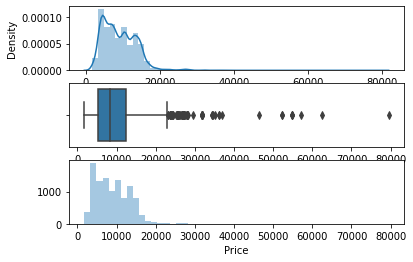

In [115]:
plt.figure(figsize=(30,20))
plot(data,'Price')

### getting a high level over-view of various ways to deal with outliers:
    Again there are various ways to deal with outliers :
    Follow Outliers.ipynb in Entire_data_science & folder of outlier_detection..
    
    
    1..Statistical imputation , ie impute it with mean , median or mode of data..
    
    a..Whenever ur data is Gaussian Distributed ,use 3 std dev approach to remove outliers in such case
         ie we will use u+3*sigma & u-3*sigma
            data pts greater than upper_boundary( u+3*sigma) are my outliers 
                & data pts which are less than lower_boundary(u-3*sigma) are my outliers
                
            Above approach is known as Z-score & it has a extended version known as Robust z-score..
            Robust Z-score is also called as Median absolute deviation method. 
            It is similar to Z-score method with some changes in parameters.
            
            
    b..If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
         where IQR=75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie IQR + 3IQR 
          
          
           Extended version of above is WINSORIZATION METHOD(PERCENTILE CAPPING)..
           This method is similar to IQR method. It says -->> 
           
           Data points that are greater than 99th percentile and data points that are below tha 1st percentile 
           are treated as outliers.
         
         
         
     c..If we have huge high dimensional data , then it is good to perform isolation forest...
         It is a clustering algo which works based on decision tree and it isolate the outliers.
         It classify the data point to outlier and not outliers..
             If the result is -1, it means that this specific data point is an outlier. 
             If the result is 1, then it means that the data point is not an outlier.

       
       
       
    d. DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)
        Which is pretty much similar with k-means 
        
        
        
        
    e..we have some statistical tests to detect whether we have some outliers in my data or not.. often termed as 
       Grubbs Test
       
       
       
    So we have tonnes of ways to deal with outliers..
       

In [165]:
#### for outliers
'''

def outlier(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR= Q3-Q1
        LE=Q1-1.5*IQR
        UE=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LE,LE)
        df[i]=df[i].mask(df[i]>UE,UE)
    return df

'''

#### follow notebooks-->> https://www.kaggle.com/harikrishna9/how-to-predict-flight-ticket-price

"\n\ndef outlier(df):\n    for i in df.describe().columns:\n        Q1=df.describe().at['25%',i]\n        Q3=df.describe().at['75%',i]\n        IQR= Q3-Q1\n        LE=Q1-1.5*IQR\n        UE=Q3+1.5*IQR\n        df[i]=df[i].mask(df[i]<LE,LE)\n        df[i]=df[i].mask(df[i]>UE,UE)\n    return df\n\n"

#### dealing with Outliers

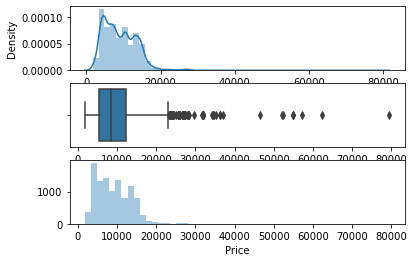

In [166]:
plot(data_train,'Price')

In [167]:
q1 = data_train['Price'].quantile(0.25)
q3 = data_train['Price'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 3 * iqr
print(Lower_tail)
Upper_tail = q3 + 3 * iqr
print(Upper_tail)

-16011.0
33661.0


In [168]:
outliers=[]
for price in data_train['Price']:
    if price > Upper_tail or price < Lower_tail:
            outliers.append(price)
        
#### optimal way

### [price for price in data_train['Price'] if price > Upper_tail or price < Lower_tail]

In [169]:
len(outliers)

16

In [170]:
print(outliers)

[36983, 52229, 54826, 36235, 54826, 35185, 79512, 62427, 54826, 36235, 34273, 46490, 34503, 34608, 52285, 57209]


In [171]:
min(outliers)

34273

In [116]:
### wherever I have price >35K just replace replace it with median of Price

data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<Figure size 2160x1440 with 0 Axes>

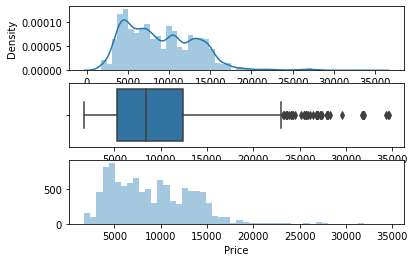

In [118]:
plt.figure(figsize=(30,20))
plot(data,'Price')

In [122]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [123]:
data.drop(columns=['Duration_total_mins'],axis=1,inplace=True)

# Lecture 11:feature selection !

In [127]:
X=data.drop(['Price'],axis=1)

In [128]:
y=data['Price']

### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    Lets get a high level overview of most of the frequently used feature selection technique..
    Bcz If I start covering each algo of feature selection , it takes 10 + hours to finish it..
    
    
### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features
    
    ways or technqiues to do it if we have regression use-case
    a..SelectKBest
        Score function:
        For regression: f_regression, mutual_info_regression
        
        f_regression
        Its backbone is pearson co-relation.. 
        
        
       mutual_info_regression-->> 
       before getting into this,very first u have to make sure u knows various statistical test like Chi-sq,Anova & p-value.
        
        
    b..ExtraTreesClassifier
       This technique gives you a score for each feature of your data,the higher the score more relevant it is
   
    
    d..SelectFromModel
    
    
    
    
    2..If we have a classification use-case
       we have score func. as chi2, f_classif, mutual_info_classif(uses information gain concept internally)
    
    

#### we have in-built feature selection methods to determine importance of feature..
#### Link-->> https://www.kaggle.com/harikrishna9/how-to-predict-flight-ticket-price

In [186]:
###np.array(X)

In [187]:
##np.array(y)

### I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

####  Feature Selection using Information Gain,

In [120]:
from sklearn.feature_selection import mutual_info_regression

In [189]:
## mutual_info_classif()

In [190]:
###mutual_info_classif(np.array(X),np.array(y))

In [129]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Journey_day            int64
Journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int32
Duration_mins          int32
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [130]:
### Check for Duplicate Feature Names (if any) prior to running algorithms
### if we have some duplicate features, we need to handle them

X.columns[X.columns.duplicated()]

Index([], dtype='object')

In [131]:
'''
Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables. 
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.

'''

mutual_info_regression(X,y)


array([0.97737744, 1.009387  , 0.78928914, 0.19399451, 0.24349874,
       0.33212788, 0.26429557, 0.40022916, 0.35377425, 0.46278714,
       0.34344787, 0.39291799, 0.45239645, 0.51139129, 0.13584276,
       0.19337555])

In [132]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp

,0
Airline,0.976625
Destination,1.003474
Total_Stops,0.787492
Journey_day,0.203700
Journey_month,0.252305
Dep_Time_hour,0.334820
Dep_Time_minute,0.250149
Arrival_Time_hour,0.400533
Arrival_Time_minute,0.342239
Duration_hours,0.464384


In [133]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.003474
Airline,0.976625
Total_Stops,0.787492
Source_Delhi,0.528719
Duration_hours,0.464384
Source_Kolkata,0.457592
Arrival_Time_hour,0.400533
Source_Banglore,0.381350
Duration_mins,0.344011
Arrival_Time_minute,0.342239


# Lecture 12:model building + saving

#### split dataset into train & test

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### what we often do in modelling:

    a..Initially ,lets build basic random model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will try to improve it..
    d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
ml_model=RandomForestRegressor()
model=ml_model.fit(X_train,y_train)
y_prediction=model.predict(X_test)

In [141]:
y_prediction

array([16713.16      ,  6422.23      ,  8855.28      , ...,
        6775.19      , 12720.01333333, 13061.2985    ])

In [138]:
y_prediction.shape

(2137,)

In [139]:
len(X_test)

2137

In [140]:
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_prediction)
print('r2 score: {}'.format(r2_score))


r2 score: 0.8097430500906758


### lets try to dump ml model using pickle & joblib..
    advantage of dumping--
    imagine in future we have new data ,& lets say we have to predict price on this huge data

    then just for this new data , we have to execute all the above cells follow the entire pipeline,  then only we are able to predict on this...


    so to get rid of such issue , will just dump it to reuse it again & again..
    what does this file store??
    this save coefficients of our model.. not an entire dataset

In [ ]:
'''
import joblib
joblib.dump(model,'Flight_price.obj')

'''

In [266]:
## !pip install pickle 
import pickle

In [ ]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')


In [ ]:
# dump information to that file
pickle.dump(rf_random,file)


In [ ]:
model=open('rf_random.pkl','rb')


In [ ]:
forest=pickle.load(model)


In [ ]:
y_prediction=forest.predict(X_test)
y_prediction


In [ ]:
metrics.r2_score(y_test,y_prediction)

In [200]:
### lets try to change random_state value from None to 42
### so we will observe our values changes 81.76 % to 82.1%

### so lets try to find best random_state value for any machine learning model

In [142]:
def randomstate(X,y,model):
    r_score={}
    for index,state in enumerate(range(0,4)):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=state)
        model.fit(X_train,y_train)
        y_prediction=model.predict(X_test)
        r2=metrics.r2_score(y_test,y_prediction)
        r_score[index]=r2
        
    

In [151]:
def randomstate(X,y,model):
    r_score={}
    for index,state in enumerate(range(0,4)):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=state)
        model.fit(X_train,y_train)
        y_prediction=model.predict(X_test)
        r2=metrics.r2_score(y_test,y_prediction)
        r_score[index]=r2
        
    return max(zip(r_score.values(), r_score.keys()))[1]
    
    
#### we can customise range(0,200) depending on our system resources.

In [143]:
re={1:0.61,2:0.68,3:0.56}

In [144]:
re.keys()

dict_keys([1, 2, 3])

In [145]:
re.values()

dict_values([0.61, 0.68, 0.56])

In [146]:
max(zip(re.values(), re.keys()))

(0.68, 2)

In [152]:
max(zip(re.values(), re.keys()))[0]

0.68

### Python | Get key with maximum value in Dictionary-- https://www.geeksforgeeks.org/python-get-key-with-maximum-value-in-dictionary/

In [207]:
randomstate(X,y,RandomForestRegressor())

2

In [208]:
### takes 1 min if we consider  , range(0,5)
### takes 2 min if we consider , range(0,20

# Lecture 13:How to automate ml pipeline !

In [ ]:
#### how to make our own metric...

In [155]:
### check this code...for MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [156]:
### for existing model
mean_absolute_percentage_error(y_test,y_prediction)

13.334742820012144

### Lets automate all the stuffs..
    let say ,I will just pass ml algo & i get several results like--
    
    raining score, predictions, r2_score, mse, mae, rmse, mape,distribution of error


In [157]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE:',mean_absolute_percentage_error(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

Training score : 0.9504673947774305
predictions are: 
 [16761.39        6608.99        8869.96       ...  6739.08
 12992.34083333 13398.25733333]


r2 score: 0.8066396619164024
MAE: 1207.211726719194
MSE: 3893367.1054529916
RMSE: 1973.1617028142907
MAPE: 13.428292116503718


C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



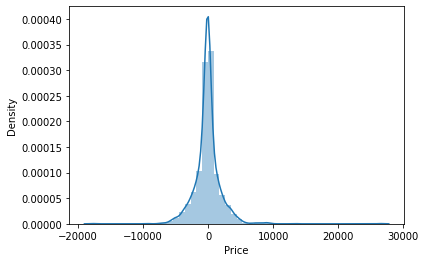

In [158]:
predict(RandomForestRegressor())

In [ ]:
### Lets try to dump your machine learning model so that u can re-use it again...
### we can dump my ml_model using ppickle ot joblib module..

In [241]:

from sklearn import metrics

## dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump=None):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE:',mean_absolute_percentage_error(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('E:\End-2-end Projects\Flight_Price/model.pkl','wb')
        pickle.dump(model,file)

Training score : 0.9530459453962473
predictions are: 
 [ 6670.29       11155.05866667 10896.02       ...  5013.76833333
  7254.24        6273.11      ]


r2 score: 0.8002854548497219
MAE: 1155.1295071730121
MSE: 3869428.7083692304
RMSE: 1967.086350003281


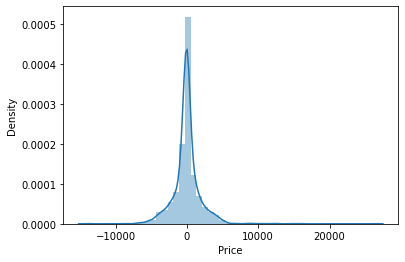

In [237]:
predict(RandomForestRegressor(),0)

#### play with multiple Algorithms

In [162]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [163]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
### from xgboost import XGBRegressor

Training score : 0.7805862501764645
predictions are: 
 [15328.45429809  7207.21438403  8316.32494989 ...  6476.63229778
 12030.30142047 12297.23298629]


r2 score: 0.7656199195494455
MAE: 1525.5051728734627
MSE: 4719311.646037211
RMSE: 2172.3976721671406
MAPE: 17.68503335663451


C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



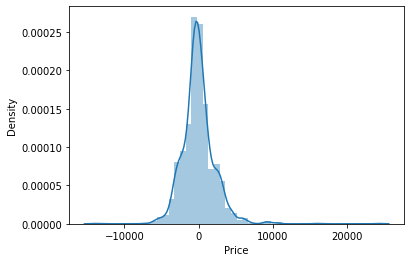

In [164]:
predict(GradientBoostingRegressor())

In [ ]:
### lets try with Linear , ridge & Lasso..

In [247]:
from sklearn.linear_model import LinearRegression

Training score : 0.6379204576856468
predictions are: 
 [ 9241.97442035 11456.42293001 11900.72542563 ...  5934.07607048
  4893.46809907  9836.2417237 ]


r2 score: 0.6045532071974679
MAE: 1959.2667241473578
MSE: 7661701.212354218
RMSE: 2767.9778200618257
MAPE: 23.27103559100221


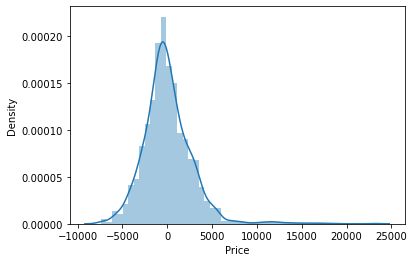

In [248]:
predict(LinearRegression())

In [159]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


Training score : 0.5796527556099607
predictions are: 
 [12756.1619069   8840.78075329  8927.18942228 ...  6366.62855098
 10518.22301089 11716.35718176]


r2 score: 0.5500279656574514
MAE: 2084.620942895458
MSE: 9060318.854664091
RMSE: 3010.036354375822
MAPE: 24.79445419921951


C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



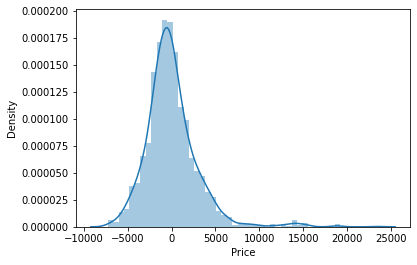

In [160]:
predict(Ridge())

Training score : 0.5796501617749807
predictions are: 
 [12750.04371205  8840.86538579  8930.70256244 ...  6369.28533236
 10522.29776446 11716.64553847]


r2 score: 0.5499584072252361
MAE: 2084.284141947271
MSE: 9061719.434093034
RMSE: 3010.2689969657254
MAPE: 24.78900816100259


C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



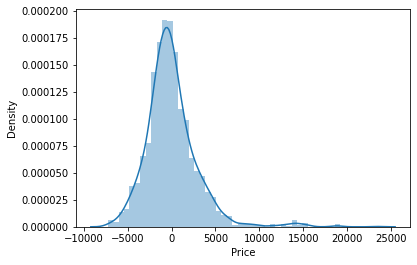

In [161]:
predict(Lasso())

In [ ]:
## how to select which ML algo we should apply for
## ans is use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics 
## & based on domain expertise knowledge Then I can say ya this model perfoms best

# Lecture 14:how to hypertune ml model 

### Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model 
    4.Check best parameters and best score

In [230]:
from sklearn.model_selection import RandomizedSearchCV

In [231]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [232]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [233]:
# Create the random grid or hyper-parameter space

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [234]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [219]:
## total iterations
6*2*4*4 *3

576

In [240]:
## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [241]:
### takes 4-5 mins 
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [242]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [243]:
### to get all the cross validation results like mean_fit_time , avg_score_time , etc..

rf_random.cv_results_

{'mean_fit_time': array([15.28483828,  8.34175396, 24.67651431, 10.1348664 , 16.04567941,
        12.8505609 , 14.83572515, 29.98349468, 13.40002402, 39.73926799]),
 'std_fit_time': array([ 0.34699404,  0.11577609,  3.96048344,  2.54753418,  1.2616142 ,
         1.15993262,  1.69995201,  8.10206333,  1.93726521, 10.0595253 ]),
 'mean_score_time': array([0.62215765, 1.14929541, 0.91323177, 1.32866756, 0.5237968 ,
        1.53705446, 1.94448884, 1.0652686 , 1.30699793, 1.15196021]),
 'std_score_time': array([0.04679454, 0.02300216, 0.28927973, 0.38451001, 0.17550514,
        0.51265178, 0.54872198, 0.34035116, 0.35429847, 0.34613417]),
 'param_n_estimators': masked_array(data=[320, 540, 760, 760, 320, 980, 1200, 540, 540, 760],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[5, 5, 100, 100, 10, 15, 10, 100, 100, 15],
           

In [244]:
### lets create dataframe of Params & Mean_test_score..
results = pd.DataFrame(rf_random.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'n_estimators': 320, 'min_samples_split': 5, ...",0.823553
1,"{'n_estimators': 540, 'min_samples_split': 5, ...",0.815731
2,"{'n_estimators': 760, 'min_samples_split': 100...",0.779060
3,"{'n_estimators': 760, 'min_samples_split': 100...",0.752469
4,"{'n_estimators': 320, 'min_samples_split': 10,...",0.830367


In [245]:
results.sort_values(by='mean_test_score',ascending=False)

,params,mean_test_score
4,"{'n_estimators': 320, 'min_samples_split': 10,...",0.830367
9,"{'n_estimators': 760, 'min_samples_split': 15,...",0.829438
0,"{'n_estimators': 320, 'min_samples_split': 5, ...",0.823553
6,"{'n_estimators': 1200, 'min_samples_split': 10...",0.816925
1,"{'n_estimators': 540, 'min_samples_split': 5, ...",0.815731
5,"{'n_estimators': 980, 'min_samples_split': 15,...",0.803501
2,"{'n_estimators': 760, 'min_samples_split': 100...",0.779060
7,"{'n_estimators': 540, 'min_samples_split': 100...",0.778933
8,"{'n_estimators': 540, 'min_samples_split': 100...",0.752910
3,"{'n_estimators': 760, 'min_samples_split': 100...",0.752469


In [246]:
### to access best parameters for our models..
results.sort_values(by='mean_test_score',ascending=False)['params'][4]

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [ ]:
#### again in your case , may be your parameters may vary a little bit , thats not a major issue..

In [ ]:
#### Now we have fetch potimal value of hyper-parameters of ml_model , now we can do build a rf model considering these params
#### then do fit & my model is able to learn some kind of relationship..
#### then do predict & evaluate your model performance..

### Hypertuning with Cross validation(K-Fold)

##### Again question is why there is need of cross validation 
    so whenever we are selecting this random state, x_train & x_test that are selected by train_test_split from dataset is 
    selected in a random way,thats why each & every time, our different entries gets selected & our accuracy fluctuates
    thats why we use cross_val_score to maintain accuracy

In [248]:
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,## never use this for Imbalance
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,#Stratified K Fold is used swith Imbalanced Dataset-so that we have equal same proportion no of yes & no split
    GridSearchCV,
    train_test_split,
)

In [249]:
# K-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=4)


In [250]:
# Random search of parameters, using k fold cross validation
# search across 576 different combinations

rf_random2=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='accuracy' ,cv=kf,verbose=2,n_jobs=-1)

In [251]:
### takes 4-5 mins 
rf_random2.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=4, shuffle=True),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   scoring='accuracy', verbose=2)

In [252]:
### hypertuning without cross validation
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [253]:
### hypertuning with cross validation
rf_random2.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 13}

In [254]:
y_pred1=rf_random.predict(X_test)
y_pred2=rf_random2.predict(X_test)

In [257]:
### hyptertuning without cross validation model accuracy ..
metrics.r2_score(y_test,y_pred1)

0.8400518625116707

In [258]:
### hyptertuning with cross validation model accuracy ..
metrics.r2_score(y_test,y_pred2)

0.8186864080720994